In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = (6,5)

In [3]:
n_particles = 20

In [4]:
y_coordinates = size[0] * np.random.rand(n_particles)

In [5]:
x_coordinates = size[1] * np.random.rand(n_particles)

In [6]:
x_coordinates

array([1.64888317, 3.91230492, 4.2243832 , 2.80282964, 1.77171338,
       0.13620636, 0.75950097, 1.63209866, 2.93998858, 0.74188755,
       0.61291598, 3.66188234, 0.98511949, 3.47010496, 0.47244612,
       4.29509058, 1.21464935, 0.35473885, 4.80385317, 2.42650804])

In [7]:
y_coordinates

array([1.7230994 , 1.4017629 , 0.90743426, 2.90394624, 1.20451627,
       4.35662486, 4.09076433, 2.38852998, 2.55044659, 5.88315922,
       2.88548986, 4.65239932, 4.33575138, 0.96962731, 1.39504398,
       1.5296484 , 5.55145851, 4.57086419, 0.77271804, 5.91219646])

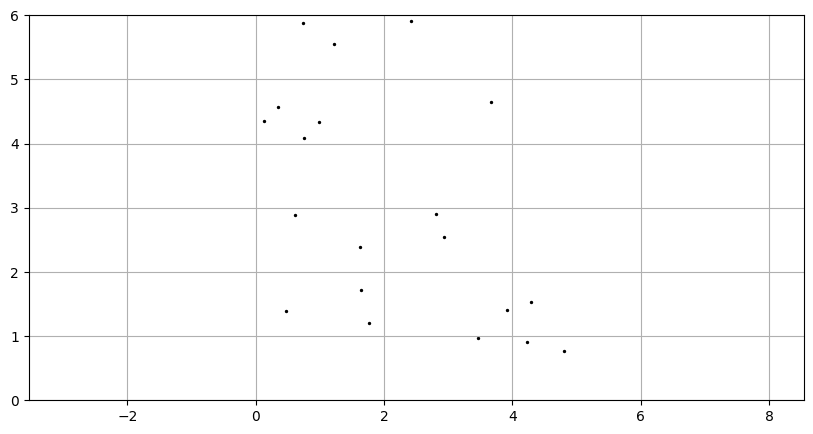

In [10]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x_coordinates, y_coordinates, c='k', s=2)
plt.axis('equal')
plt.xlim([0,size[1]])
plt.ylim([0,size[0]])
# plt.yticks([0,1,2,3])
plt.grid(alpha=1)

In [11]:
np.floor(x_coordinates).astype(int)

array([1, 3, 4, 2, 1, 0, 0, 1, 2, 0, 0, 3, 0, 3, 0, 4, 1, 0, 4, 2])

In [12]:
np.floor(y_coordinates).astype(int)

array([1, 1, 0, 2, 1, 4, 4, 2, 2, 5, 2, 4, 4, 0, 1, 1, 5, 4, 0, 5])

In [13]:
empty_image = np.zeros(size)

for x, y in zip(np.floor(x_coordinates).astype(int), np.floor(y_coordinates).astype(int)):

    empty_image[y , x] += 1

In [14]:
empty_image

array([[0., 0., 0., 1., 2.],
       [1., 2., 0., 1., 1.],
       [1., 1., 2., 0., 0.],
       [0., 0., 0., 0., 0.],
       [4., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0.]])

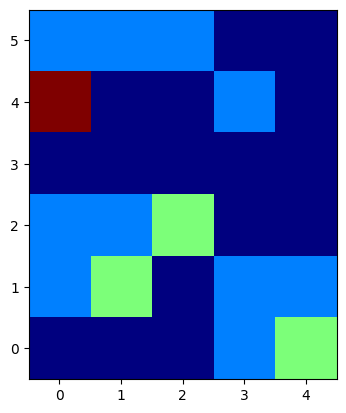

In [15]:
# fig = plt.figure(figsize=(10,5))
plt.imshow(empty_image, cmap='jet', origin='lower')
# plt.colorbar()

In [16]:
from pykitPIV import Image

In [17]:
image = Image(random_seed=100)

In [18]:
particle_height_coordinate = 2.9
particle_width_coordinate = 2.8
image_size = (6,5)
diameter=1

In [19]:
particles_with_gaussian_light = np.zeros(image_size)

px_c_height = np.floor(particle_height_coordinate).astype(int)
px_c_width = np.floor(particle_width_coordinate).astype(int)
ceil_of_particle_radius = np.ceil(diameter/2).astype(int)

for h in range(px_c_height-ceil_of_particle_radius, px_c_height+ceil_of_particle_radius+1):
    for w in range(px_c_width-ceil_of_particle_radius, px_c_width+ceil_of_particle_radius+1):

        # Only change the value of pixels that are within the image area:
        if (h >= 0 and h < image_size[0]) and (w >= 0 and w < image_size[1]):

            coordinate_height = h + 0.5 - particle_height_coordinate
            coordinate_width = w + 0.5 - particle_width_coordinate

            print("Pixel: " + str(h) + ', '+ str(w))

            print('Height: ' + str(coordinate_height))
            print('Width: ' + str(coordinate_width))
            print('- '*20)

            particles_with_gaussian_light[h,w] = particles_with_gaussian_light[h,w] + image.compute_light_intensity_at_pixel(1,
                                                                                                                            diameter,
                                                                                                                            coordinate_height,
                                                                                                                            coordinate_width,
                                                                                                                            alpha=1)


Pixel: 1, 1
Height: -1.4
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 1, 2
Height: -1.4
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 1, 3
Height: -1.4
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 1
Height: -0.3999999999999999
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 2
Height: -0.3999999999999999
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 2, 3
Height: -0.3999999999999999
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 1
Height: 0.6000000000000001
Width: -1.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 2
Height: 0.6000000000000001
Width: -0.2999999999999998
- - - - - - - - - - - - - - - - - - - - 
Pixel: 3, 3
Height: 0.6000000000000001
Width: 0.7000000000000002
- - - - - - - - - - - - - - - - - - - - 


In [20]:
px_c_height, px_c_width

(2, 2)

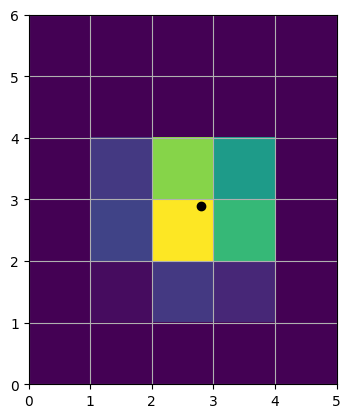

In [21]:
plt.scatter(particle_width_coordinate, particle_height_coordinate, c='k')
im = plt.imshow(particles_with_gaussian_light, origin='lower')
plt.grid()
f = lambda pixel: pixel + 0.5
im.set_extent([f(x) for x in im.get_extent()])


***